In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# Preprocess the data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Embarked'] = df['Embarked'].fillna('S')

# Split the data into features (X) and target (y)
X = df.drop(['Survived', 'PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rfc.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)
print('Classification Report:')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

ValueError: could not convert string to float: 'S'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived

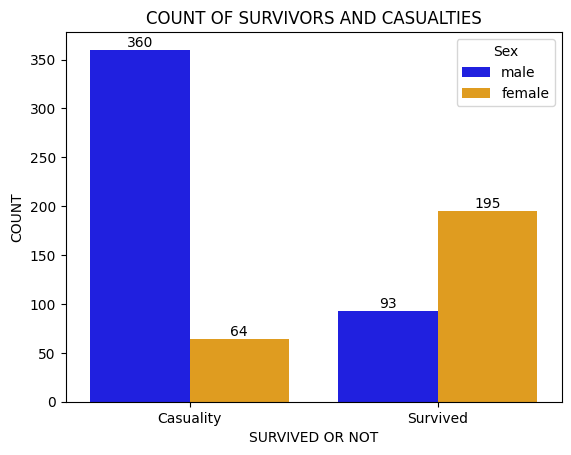

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
df= pd.read_csv("Titanic-Dataset.csv")
df.head()
df.info()
df['Cabin']= df['Cabin'].fillna('Not Listed')
df.info()
df.dropna(inplace=True)
df.duplicated().sum()
pal= ['blue', 'orange']
a= sns.countplot(data= df, x= df['Survived'], hue=df['Sex'], palette= pal)
for container in a.containers:
    a.bar_label(container)
plt.title("COUNT OF SURVIVORS AND CASUALTIES")
plt.xlabel("SURVIVED OR NOT")
plt.ylabel("COUNT")
plt.gca().set_xticklabels(['Casuality', 'Survived'])
plt.show()

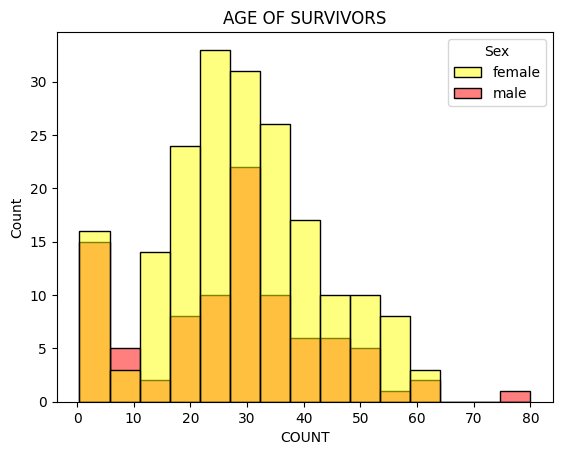

In [ ]:
pal1= ['yellow', 'red']
survivors= df[df['Survived']==1]
sns.histplot(data= survivors, x= survivors['Age'], bins= 15, hue=survivors['Sex'], palette= pal1)
plt.title("AGE OF SURVIVORS")
plt.xlabel('AGE')
plt.xlabel('COUNT')
plt.show()


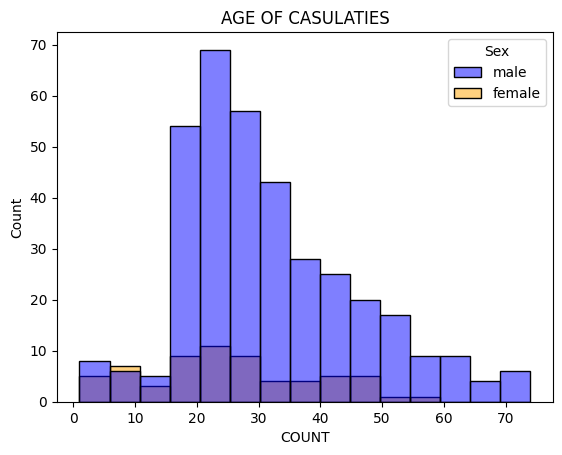

In [ ]:
notsurvivors= df[df['Survived']==0]
sns.histplot(data= notsurvivors, x= notsurvivors['Age'], bins= 15, hue= notsurvivors['Sex'], palette= pal)
plt.title("AGE OF CASULATIES")
plt.xlabel('AGE')
plt.xlabel('COUNT')
plt.show()


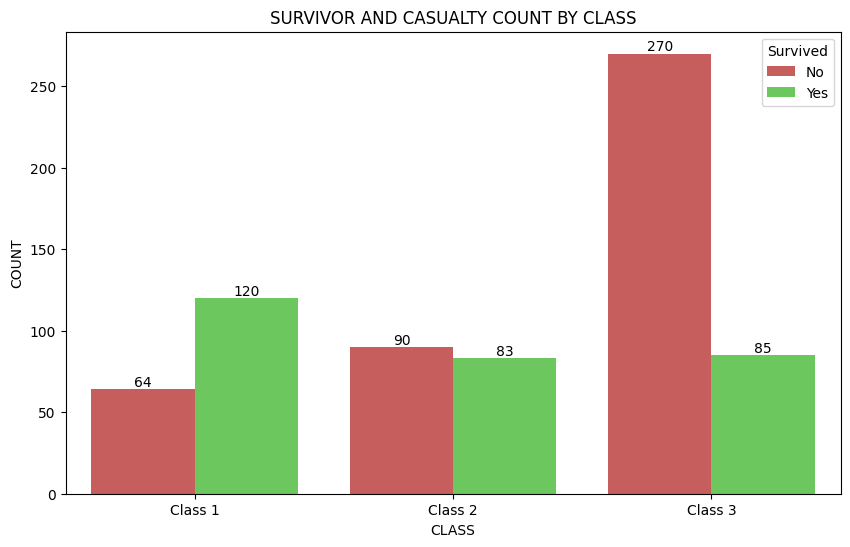

In [ ]:
pal3=['#D84D4D', '#5ED84D','#D84D4D', '#5ED84D','#D84D4D', '#5ED84D']
plt.figure(figsize=(10, 6))
a=sns.countplot(data=df, x='Pclass', hue='Survived', palette= pal3)
for container in a.containers:
    a.bar_label(container)
plt.title('SURVIVOR AND CASUALTY COUNT BY CLASS')
plt.xlabel('CLASS')
plt.ylabel('COUNT')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.gca().set_xticklabels(['Class 1', 'Class 2', 'Class 3'])
plt.show()


In [ ]:
df['Sex_numeric']= df['Sex'].apply(lambda x:1 if x=='female' else 0)
df[['Survived', 'Pclass', 'Age', 'Sex_numeric', 'SibSp', 'Parch', 'Fare']].corr().style.background_gradient(cmap='coolwarm')

,Survived,Pclass,Age,Sex_numeric,SibSp,Parch,Fare
Survived,1.000000,-0.356462,-0.082446,0.536762,-0.015523,0.095265,0.266100
Pclass,-0.356462,1.000000,-0.365902,-0.150826,0.065187,0.023666,-0.552893
Age,-0.082446,-0.365902,1.000000,-0.099037,-0.307351,-0.187896,0.093143
Sex_numeric,0.536762,-0.150826,-0.099037,1.000000,0.106296,0.249543,0.182457
SibSp,-0.015523,0.065187,-0.307351,0.106296,1.000000,0.383338,0.139860
Parch,0.095265,0.023666,-0.187896,0.249543,0.383338,1.000000,0.206624
Fare,0.266100,-0.552893,0.093143,0.182457,0.139860,0.206624,1.000000


In [ ]:
from sklearn.model_selection import train_test_split
X= df[['Sex_numeric', 'Parch', 'Fare']]
y= df['Survived']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.3, random_state= 42)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred= lr.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7663551401869159

In [ ]:
from sklearn.metrics import confusion_matrix
conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred))
conf_matrix

,0,1
0,104,18
1,32,60
